In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import pandas as pd


In [184]:

T = 50 # miliseconds of simulation time
start_time=0
end_time=50
inp_num = 10
rec_num = 80
inh_num = 20
nrns = np.array((inp_num*[0]+rec_num*[1]+inh_num*[2]))

inh_duration = 1
inp_delay_range=(1,31)
rec_delay_range=(1,5)
inp_event_thresh=2
inh_event_thresh=1
combination_samples=1
inh_weight = 5
inp_weight = 1

params = {
    'T' : T, # miliseconds of simulation time
    'start_time':start_time,
    'end_time':end_time,
    'inp_num' : inp_num,
    'rec_num' : rec_num,
    'inh_num' : inh_num,
    'inh_duration' : inh_duration,
    'inp_delay_range':inp_delay_range,
    'rec_delay_range':rec_delay_range,
    'inp_event_thresh':inp_event_thresh,
    'inh_event_thresh':inh_event_thresh,
    'inh_weight':inh_weight,
    'combination_samples':combination_samples
}

In [185]:
from itertools import product

l1, l2 = np.arange(*inp_delay_range), np.arange(*inp_delay_range)
permutations = np.array(list(product(l1, l2)))
permutation_samples = permutations.shape[0]

In [186]:
np.array(permutations).shape[0]

900

In [195]:
ls = [np.arange(*inp_delay_range) for k in range(inp_num)]
# np.array(list(product(ls)))
ls

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 1,  2,  3,  4,  5,  6,  7

In [187]:
inp_delays = np.random.randint(*rec_delay_range,(inp_num ,rec_num))
rec_delays = np.random.randint(*rec_delay_range,(rec_num+inp_num+inh_num,rec_num+inp_num+inh_num))

from itertools import product

ls = [np.arange(*inp_delay_range) for k in range(inp_num)]

permutations = np.array(list(product(l1, l2)))
permutation_samples = permutations.shape[0]



all_input_events = np.zeros((permutation_samples, T, inp_num))
all_rec_events = np.zeros((permutation_samples, T,rec_num+inh_num))
all_inh_events = np.zeros((permutation_samples, T, inh_num))
all_events = np.zeros((permutation_samples,T,inp_num+rec_num+inh_num))

inp_perms = permutations
permutation_samples

for i,k in enumerate(inp_perms):
    for j in range(k.shape[0]):
        all_input_events[i,k[j],j]=inp_weight

In [188]:

for l,inp_events in enumerate(tqdm(all_input_events[:30,...])):
    rec_events = all_rec_events[l,...]
    inh_events = all_inh_events[l,...]
    for t in range(0,end_time):
        for j in range(rec_num):
            I = 0

            for i in range(inp_num):
                I += inp_events[t-inp_delays[i,j],i]
            for i in range(rec_num+inh_num):
                if i!=j:
                    I += rec_events[t-rec_delays[i,j],i]

            if I>=inp_event_thresh:
                rec_events[t,j] =1 
            else:
                rec_events[t,j] =0

        for j in range(rec_num,rec_num+inh_num):
            I = 0

            for i in range(rec_num):
                if i!=j:
                    I += rec_events[t-rec_delays[i,j],i]


            if I>inh_event_thresh:
                rec_events[t,j] =-inh_weight
            else:
                rec_events[t,j] =0
    all_events[l,...] = np.concatenate((inp_events,rec_events),axis=1)
    all_input_events[l,...] = inp_events
    all_rec_events[l,...] = rec_events
    all_inh_events[l,...] = inh_events

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:08<00:00,  3.63it/s]


In [189]:
all_rec_events.shape

(900, 50, 100)

In [190]:
np.sum(np.abs(all_rec_events),axis=(1,2))[:30]

array([5678., 5659., 5658., 5658., 5658., 5658., 5658., 5658., 5658.,
       5658., 5658., 5658., 5658., 5658., 5658., 5658., 5658., 5658.,
       5658., 5658., 5658., 5658., 5658., 5658., 5658., 5658., 5658.,
       5658., 5658., 5658.])

# First question, what amount of neurons do I need in the reservoir to get X% specificity in the output representation?

In [191]:
colors = ['#1f77b4']*inp_num + ['#d62728']*rec_num + ['#17becf']*inh_num
colors

['#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#1f77b4',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d62728',
 '#d

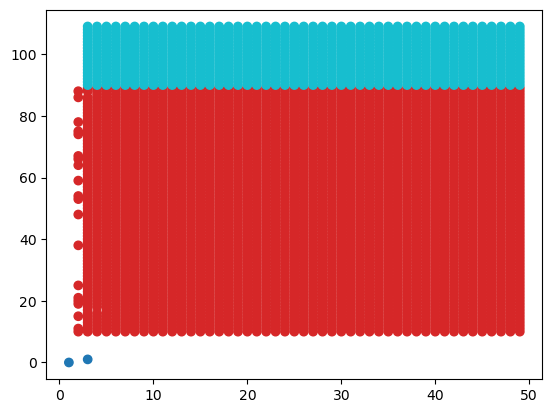

In [192]:
plt.figure()
i = 2
events = all_events[i,...]
palette = [colors[k] for k in np.where(events)[1]]
plt.scatter(np.where(events)[0], np.where(events)[1],c=palette)
plt.show()